In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import Model
from keras.layers import Input, Conv2D, Activation, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout, Concatenate, Add
from keras.optimizers import Adam
from ipywidgets import interact
import ipywidgets as widgets
from keras.initializers import RandomNormal
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import keras
from sklearn.linear_model import LinearRegression
from keras.utils import plot_model

In [2]:
ls

'#2 DL Model Capstone 2 HED.ipynb'
'#2 DL Model Capstone 2.ipynb'
'#2 DL Model Capstone 2 v2_left_and_right_image.ipynb'
'#2 DL Model Capstone 2 v2_left_image.ipynb'
'#2 DL Model Capstone 2 v2-right_Image.ipynb'
'Step 1. Data Wrangling'/
 ThinSectionAE_left-model-01-67.7328-77.2345.hdf5
 ThinSectionAE_left-model-01-71.2402-67.4579.hdf5
 ThinSectionAE_left-model-02-53.8265-39.8035.hdf5
 ThinSectionAE_left-model-04-52.0984-47.0549.hdf5
 ThinSectionAE_left-model-05-50.6716-36.6940.hdf5
 ThinSectionAE_left-model-14-30.9124-37.1557.hdf5
 ThinSectionAE_left-model-14-39.5622-31.2154.hdf5
 ThinSectionAE_left-model-17-29.8826-33.7616.hdf5
 ThinSectionAE_left-model-18-27.5152-29.0510.hdf5
 ThinSectionAE_left-model-19-36.5394-29.7067.hdf5
 ThinSectionAE_left-model-20-36.6715-25.7717.hdf5
 ThinSectionAE_left-model-28-32.2335-24.6727.hdf5
 ThinSectionAE_left-model-30-29.4121-21.1781.hdf5
 ThinSectionAE_left-model-32-22.8244-28.1822.hdf5
 ThinSectionAE_left-model-35-21.6647-28.0172.hdf5
 ThinSection

In [3]:
dir_path = 'Step 1. Data Wrangling/'

In [4]:
df_wellA = pd.read_csv(dir_path+'DATA_for_DL_Well_A_data.csv')
df_wellA

,Unnamed: 0,"Depth, m","Porosity, pc",File Name
0,0,3837.55,10.8,15_9_19_A\15_9_19_A_p2_3837.55.png
1,1,3838.50,17.2,15_9_19_A\15_9_19_A_p2_3838.50.png
2,2,3839.40,12.7,15_9_19_A\15_9_19_A_p3_3839.40.png
3,3,3840.45,21.0,15_9_19_A\15_9_19_A_p3_3840.45.png
4,4,3841.45,22.1,15_9_19_A\15_9_19_A_p4_3841.45.png
...,...,...,...,...
147,147,3995.50,18.2,15_9_19_A\15_9_19_A_p79_3995.50.png
148,148,3996.40,15.7,15_9_19_A\15_9_19_A_p79_3996.40.png
149,149,3997.50,11.7,15_9_19_A\15_9_19_A_p80_3997.50.png
150,150,3998.45,15.4,15_9_19_A\15_9_19_A_p80_3998.45.png


In [5]:
X_dataAleft=[]
X_dataAright=[]
y_dataA=[]
for ind in df_wellA.index:
    y_dataA.append(df_wellA['Porosity, pc'][ind])
    im_left = Image.open((dir_path+df_wellA['File Name'][ind][:-4]).replace('\\','/')+'_left.jpg')
    im_right = Image.open((dir_path+df_wellA['File Name'][ind][:-4]).replace('\\','/')+'_right.jpg')
    X_dataAleft.append(np.array(im_left))
    X_dataAright.append(np.array(im_right))
    #print(ind,df_wellA['Porosity, pc'][ind],df_wellA['File Name'][ind])

In [6]:
y_dataA=np.array(y_dataA)/36
y_dataA.shape

(152,)

In [7]:
X_dataAleft=np.array(X_dataAleft)/255
X_dataAleft.shape

(152, 1536, 1024, 3)

In [8]:
X_dataAright=np.array(X_dataAright)/255
X_dataAright.shape

(152, 1536, 1024, 3)

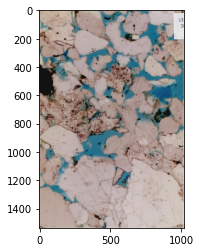

In [9]:
plt.imshow(X_dataAleft[1,:,:,:])

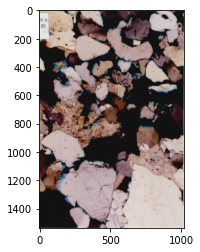

In [10]:
plt.imshow(X_dataAright[1,:,:,:])

In [ ]:
plt.imshow(np.flip(X_dataAleft,axis=1)[1,:,:,:])

In [ ]:
plt.imshow(np.flip(np.flip(X_dataAleft,axis=1),axis=2)[1,:,:,:])

In [ ]:
plt.imshow(np.flip(X_dataAleft,axis=2)[1,:,:,:])

In [11]:
X_dataAleft=np.concatenate((X_dataAleft,np.flip(X_dataAleft,axis=1),np.flip(X_dataAleft,axis=2),np.flip(np.flip(X_dataAleft,axis=1),axis=2)),axis=0)
y_dataA=np.concatenate((y_dataA,y_dataA,y_dataA,y_dataA),axis=0)
print(X_dataAleft.shape)
print(y_dataA.shape)

(608, 1536, 1024, 3)
(608,)


In [12]:
X_dataAright=np.concatenate((X_dataAright,np.flip(X_dataAright,axis=1),np.flip(X_dataAright,axis=2),np.flip(np.flip(X_dataAright,axis=1),axis=2)),axis=0)
print(X_dataAright.shape)

(608, 1536, 1024, 3)


In [21]:
def plot_thin_section(item):
    
    fig, ax = plt.subplots((2,2),figsize=(5, 5),frameon=False)
    
    ax.title.set_text('Porosity # '+str(round(y_dataA[item],2)))
    ax[0,0].imshow(X_dataAleft[item,:,:,:])
    ax[1,0].imshow(X_dataAright[item,:,:,:])

In [22]:
sliders_item = widgets.IntSlider(min=0, max=X_dataAleft.shape[0], step=1, value=0, description='Item # ')
interact(plot_thin_section, item=sliders_item)

interactive(children=(IntSlider(value=0, description='Item # ', max=608), Output()), _dom_classes=('widget-int…

<function __main__.plot_thin_section(item)>

<Figure size 360x360 with 0 Axes>

In [14]:
X_trainleft, X_testleft, X_trainright, X_testright, y_train, y_test = train_test_split(X_dataAleft, X_dataAright, y_dataA, test_size=0.10, random_state=42)
print(X_trainleft.shape)
print(X_testleft.shape)
print(X_trainright.shape)
print(X_testright.shape)
print(y_train.shape)
print(y_test.shape)

(547, 1536, 1024, 3)
(61, 1536, 1024, 3)
(547, 1536, 1024, 3)
(61, 1536, 1024, 3)
(547,)
(61,)


In [85]:
keras.backend.clear_session()
# define an encoder block
def define_encoder_block(layer_in, n_filters, stride=(2,2), batchnorm=True):
    
    # weight initialization
    init = RandomNormal(stddev=0.02)
    
    # add downsampling layer
    g = Conv2D(n_filters, (2,2), strides=stride, padding='same', kernel_initializer=init)(layer_in)
    
    g = MaxPooling2D()(g)
    
    # conditionally add batch normalization
    if batchnorm:
        g = BatchNormalization()(g, training=True)
    
    
    # leaky relu activation
    #g = LeakyReLU(alpha=0.2)(g)
    g = Activation('relu')(g)
    
    return g
 
 
    
# define the standalone generator model
def define_generator(image_shape):
    
    # weight initialization
    init = RandomNormal(stddev=0.02)
    
    # image input
    in_imageLeft = Input(shape=image_shape)
    in_imageRight = Input(shape=image_shape)
    
    # encoder model
    e1L = define_encoder_block(in_imageLeft, 64, stride=(3,2), batchnorm=False)
    e2L = define_encoder_block(e1L, 128)
    e3L = define_encoder_block(e2L, 256)
    e4L = define_encoder_block(e3L, 256)

    # encoder model
    e1R = define_encoder_block(in_imageRight, 64, stride=(3,2), batchnorm=False)
    e2R = define_encoder_block(e1R, 128)
    e3R = define_encoder_block(e2R, 256)
    e4R = define_encoder_block(e3R, 256)

    # define model
    modelLeft = Model(in_imageLeft, e4L)
    modelRight = Model(in_imageRight, e4R)
    
    combined = Add()([modelLeft.output, modelRight.output])

    # bottleneck, no batch norm and relu
    b = Conv2D(512, (2,2), strides=(2,2), padding='same', kernel_initializer=init)(combined)
    b = Activation('relu')(b)
    
    # bottleneck, no batch norm and relu
    #bL = Conv2D(512, (2,2), strides=(2,2), padding='same', kernel_initializer=init)(e4L)
    #bL = Activation('relu')(bL)

    # bottleneck, no batch norm and relu
    #bR = Conv2D(512, (2,2), strides=(2,2), padding='same', kernel_initializer=init)(e4R)
    #bR = Activation('relu')(bR)

    x = Flatten()(b)
    x = Dense(128)(x)
    x = Activation("relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    
    #xL = Flatten()(bL)
    #xL = Dense(128)(xL)
    #xL = Activation("relu")(xL)
    #xL = BatchNormalization()(xL)
    #xL = Dropout(0.25)(xL)

    #xR = Flatten()(bR)
    #xR = Dense(128)(xR)
    #xR = Activation("relu")(xR)
    #xR = BatchNormalization()(xR)
    #xR = Dropout(0.25)(xR)

    # apply another FC layer, this one to match the number of nodes
    # coming out of the MLP
    x = Dense(64)(x)
    x = Activation("relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    
    # apply another FC layer, this one to match the number of nodes
    # coming out of the MLP
    #xL = Dense(64)(xL)
    #xL = Activation("relu")(xL)
    #xL = BatchNormalization()(xL)
    #xL = Dropout(0.25)(xL)

    # apply another FC layer, this one to match the number of nodes
    # coming out of the MLP
    #xR = Dense(64)(xR)
    #xR = Activation("relu")(xR)
    #xR = BatchNormalization()(xR)
    #xR = Dropout(0.25)(xR)
    
    
    # check to see if the regression node should be added
    #if regress:
        #x = Dense(1, activation="linear")(x)
    #out_imageLeft = Dense(1, activation="sigmoid")(xL)
    #out_imageRight = Dense(1, activation="sigmoid")(xR)
    

    
    #combined = Add()([modelLeft.output, modelRight.output])

    z = Dense(1, activation="sigmoid")(x)
    
    # our model will accept the inputs of the two branches and
    # then output a single value
    model = Model(inputs=[modelLeft.input, modelRight.input], outputs=z)
    
    return model

In [86]:
keras.backend.clear_session()
# define input shape based on the loaded dataset
image_shape = X_trainleft[0].shape

g_model = define_generator(image_shape)

# compile model
opt = Adam(lr=0.001, beta_1=0.5)

g_model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['mse']) #, 'mae', 'mean_absolute_percentage_error'

In [87]:
g_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1536, 1024, 3 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1536, 1024, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 832         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 512, 512, 64) 832         input_2[0][0]                    
____________________________________________________________________________________________

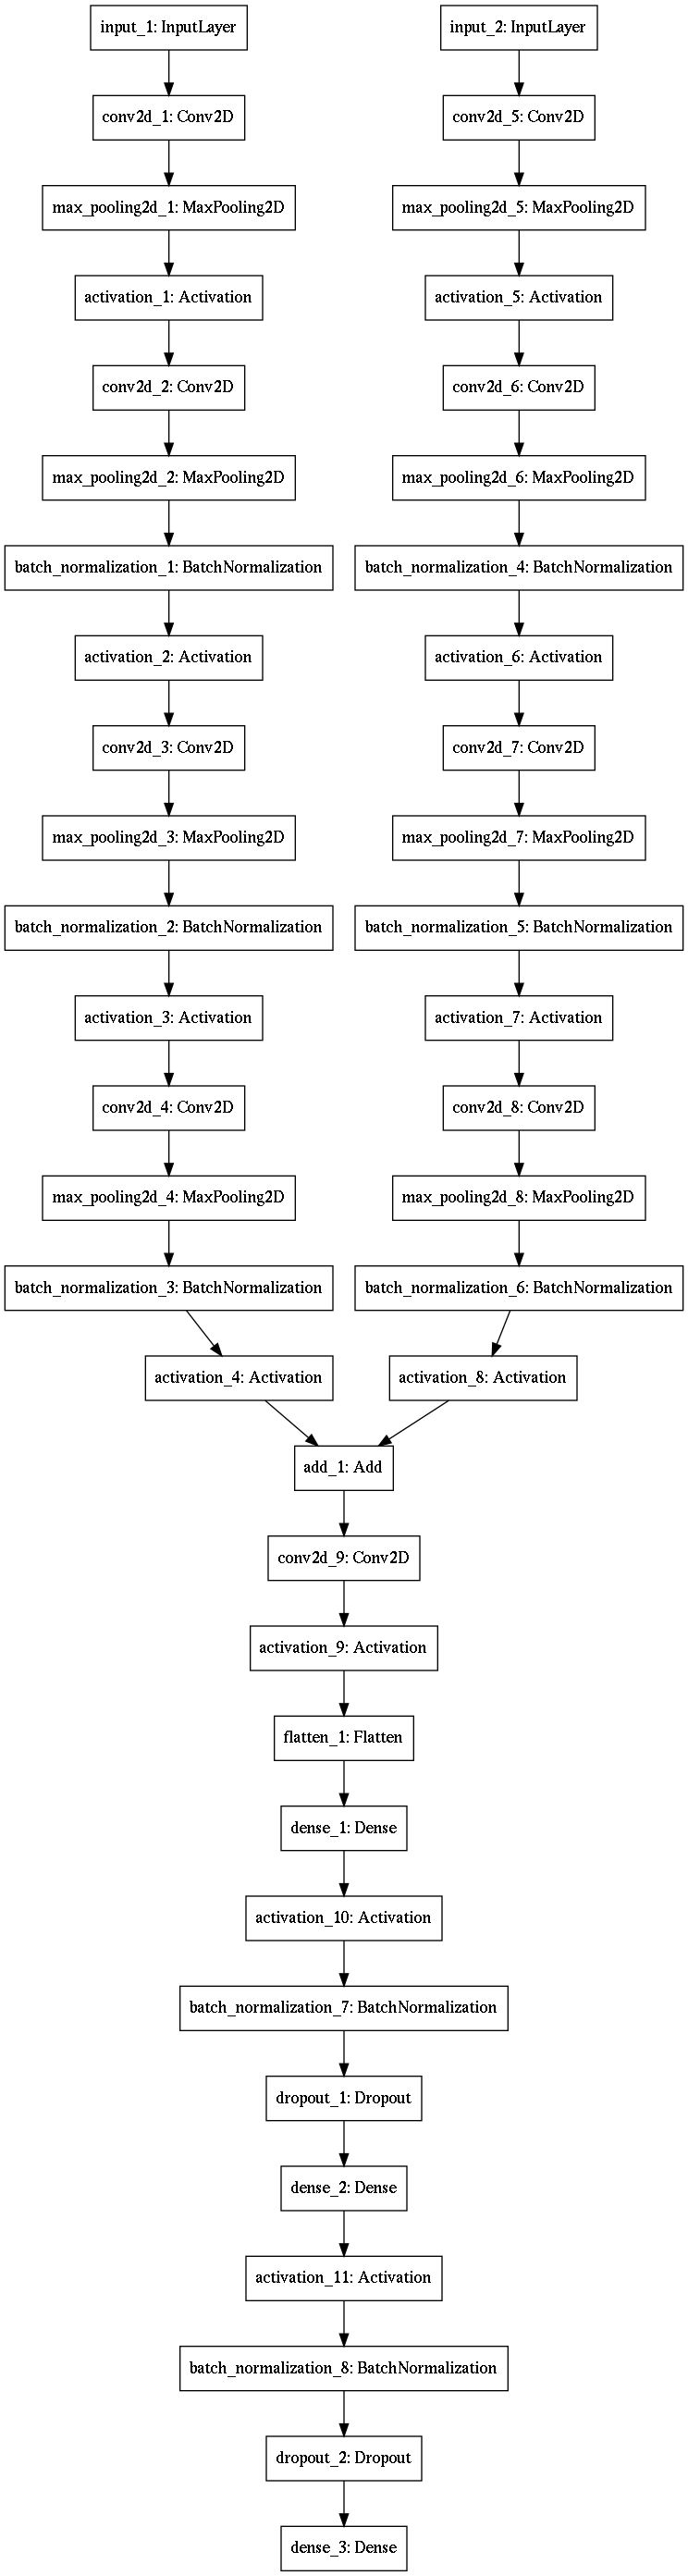

In [88]:
plot_model(g_model)

In [64]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
filepath = "ThinSectionAE_left_right-model-{epoch:02d}-{loss:.4f}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min',period=1)

history = g_model.fit([X_trainleft,X_trainright], y_train,
          epochs=200,
          batch_size=32,
          shuffle=True,
          verbose=1,
          validation_data=([X_testleft,X_testright], y_test),
          callbacks=[checkpoint])

Train on 547 samples, validate on 61 samples
Epoch 1/200
547/547 [==============================] - 165s 301ms/step - loss: 67.1478 - mse: 0.0876 - val_loss: 141.7452 - val_mse: 0.2239

Epoch 00001: val_loss improved from inf to 141.74518, saving model to ThinSectionAE_left_right-model-01-67.1478-141.7452.hdf5
Epoch 2/200
547/547 [==============================] - 132s 241ms/step - loss: 54.5970 - mse: 0.0672 - val_loss: 141.5649 - val_mse: 0.2323

Epoch 00002: val_loss improved from 141.74518 to 141.56487, saving model to ThinSectionAE_left_right-model-02-54.5970-141.5649.hdf5
Epoch 3/200
547/547 [==============================] - 127s 233ms/step - loss: 47.4497 - mse: 0.0577 - val_loss: 97.1451 - val_mse: 0.1538

Epoch 00003: val_loss improved from 141.56487 to 97.14512, saving model to ThinSectionAE_left_right-model-03-47.4497-97.1451.hdf5
Epoch 4/200
547/547 [==============================] - 130s 238ms/step - loss: 45.8613 - mse: 0.0553 - val_loss: 144.0656 - val_mse: 0.2358

Epoc

547/547 [==============================] - 125s 229ms/step - loss: 21.4785 - mse: 0.0171 - val_loss: 21.7946 - val_mse: 0.0160

Epoch 00038: val_loss improved from 22.31895 to 21.79456, saving model to ThinSectionAE_left_right-model-38-21.4785-21.7946.hdf5
Epoch 39/200
547/547 [==============================] - 126s 231ms/step - loss: 22.3894 - mse: 0.0151 - val_loss: 30.3360 - val_mse: 0.0188

Epoch 00039: val_loss did not improve from 21.79456
Epoch 40/200
547/547 [==============================] - 126s 231ms/step - loss: 22.7045 - mse: 0.0166 - val_loss: 26.0108 - val_mse: 0.0182

Epoch 00040: val_loss did not improve from 21.79456
Epoch 41/200
547/547 [==============================] - 126s 230ms/step - loss: 22.5315 - mse: 0.0154 - val_loss: 35.3104 - val_mse: 0.0466

Epoch 00041: val_loss did not improve from 21.79456
Epoch 42/200
547/547 [==============================] - 127s 233ms/step - loss: 22.5995 - mse: 0.0162 - val_loss: 22.8810 - val_mse: 0.0154

Epoch 00042: val_loss d


Epoch 00078: val_loss did not improve from 18.69263
Epoch 79/200
547/547 [==============================] - 123s 225ms/step - loss: 12.0385 - mse: 0.0050 - val_loss: 22.2500 - val_mse: 0.0129

Epoch 00079: val_loss did not improve from 18.69263
Epoch 80/200
547/547 [==============================] - 123s 225ms/step - loss: 14.9674 - mse: 0.0067 - val_loss: 37.5471 - val_mse: 0.0559

Epoch 00080: val_loss did not improve from 18.69263
Epoch 81/200
547/547 [==============================] - 124s 227ms/step - loss: 13.6980 - mse: 0.0065 - val_loss: 23.1170 - val_mse: 0.0196

Epoch 00081: val_loss did not improve from 18.69263
Epoch 82/200
547/547 [==============================] - 124s 226ms/step - loss: 14.9336 - mse: 0.0065 - val_loss: 22.8773 - val_mse: 0.0103

Epoch 00082: val_loss did not improve from 18.69263
Epoch 83/200
547/547 [==============================] - 122s 223ms/step - loss: 13.8537 - mse: 0.0056 - val_loss: 18.6406 - val_mse: 0.0117

Epoch 00083: val_loss improved fro

547/547 [==============================] - 120s 219ms/step - loss: 13.5876 - mse: 0.0068 - val_loss: 20.1411 - val_mse: 0.0172

Epoch 00121: val_loss did not improve from 18.48285
Epoch 122/200
547/547 [==============================] - 119s 218ms/step - loss: 12.9599 - mse: 0.0060 - val_loss: 21.5638 - val_mse: 0.0184

Epoch 00122: val_loss did not improve from 18.48285
Epoch 123/200
547/547 [==============================] - 120s 219ms/step - loss: 13.3787 - mse: 0.0064 - val_loss: 19.2692 - val_mse: 0.0134

Epoch 00123: val_loss did not improve from 18.48285
Epoch 124/200
547/547 [==============================] - 117s 213ms/step - loss: 12.6242 - mse: 0.0057 - val_loss: 19.6994 - val_mse: 0.0139

Epoch 00124: val_loss did not improve from 18.48285
Epoch 125/200
547/547 [==============================] - 118s 216ms/step - loss: 13.7828 - mse: 0.0061 - val_loss: 23.7004 - val_mse: 0.0155

Epoch 00125: val_loss did not improve from 18.48285
Epoch 126/200
547/547 [=====================


Epoch 00162: val_loss did not improve from 17.03439
Epoch 163/200
547/547 [==============================] - 118s 215ms/step - loss: 11.5580 - mse: 0.0048 - val_loss: 19.2497 - val_mse: 0.0150

Epoch 00163: val_loss did not improve from 17.03439
Epoch 164/200
547/547 [==============================] - 120s 220ms/step - loss: 11.9578 - mse: 0.0047 - val_loss: 18.4165 - val_mse: 0.0159

Epoch 00164: val_loss did not improve from 17.03439
Epoch 165/200
547/547 [==============================] - 118s 215ms/step - loss: 12.4922 - mse: 0.0047 - val_loss: 17.9136 - val_mse: 0.0128

Epoch 00165: val_loss did not improve from 17.03439
Epoch 166/200
547/547 [==============================] - 119s 217ms/step - loss: 12.9701 - mse: 0.0051 - val_loss: 28.1205 - val_mse: 0.0299

Epoch 00166: val_loss did not improve from 17.03439
Epoch 167/200
547/547 [==============================] - 117s 215ms/step - loss: 11.5592 - mse: 0.0041 - val_loss: 22.3381 - val_mse: 0.0176

Epoch 00167: val_loss did not

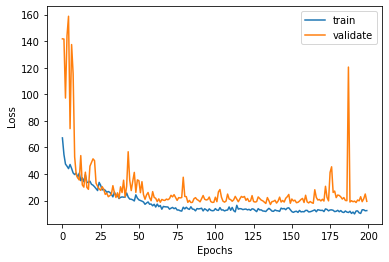

In [65]:
# plot training history
plt.plot(g_model.history.history['loss'], label='train')
plt.plot(g_model.history.history['val_loss'], label='validate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Learning_rate=Variable')
plt.legend()
plt.show()

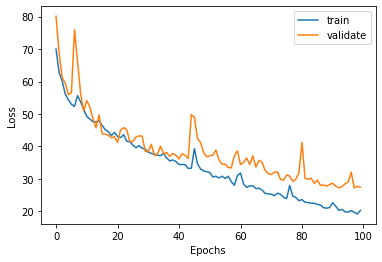

In [43]:
# plot training history
plt.plot(g_model.history.history['loss'], label='train')
plt.plot(g_model.history.history['val_loss'], label='validate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Learning_rate=Variable')
plt.legend()
plt.show()

coefficient of determination: 0.6949107495078617


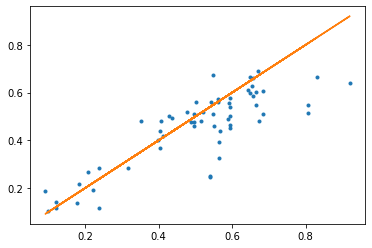

In [68]:
model = load_model('savemodels/ThinSectionAE_left_right-model-137-13.2384-17.0344.hdf5') #dropout=0.5, max pooling added, lr -.001, filter (2,2) , mpe, batch size 8
X_test_predict = model.predict([X_testleft,X_testright])
plt.plot(y_test,X_test_predict,'.')
plt.plot(y_test,y_test,'-')
linear = LinearRegression()
linear.fit(y_test.reshape(X_test_predict.shape[0],X_test_predict.shape[1]),X_test_predict.reshape(X_test_predict.shape[0],X_test_predict.shape[1]))
r_sq = linear.score(y_test.reshape(X_test_predict.shape[0],X_test_predict.shape[1]),X_test_predict.reshape(X_test_predict.shape[0],X_test_predict.shape[1]))
print('coefficient of determination:', r_sq)

### Tuning Learning rate

Text(0, 0.5, 'Learning Rate')

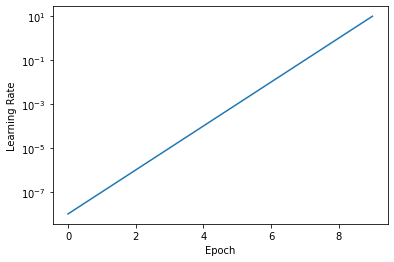

In [69]:
epochs = np.array(range(10))
x= 1e-8 * 10**(epochs)
plt.semilogy(epochs,x)
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')

In [52]:
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch))

history = g_model.fit([X_trainleft,X_trainright], y_train,
          epochs=10,
          batch_size=32,
          shuffle=True,
          verbose=1,
          validation_data=([X_testleft,X_testright], y_test),
          callbacks=[lr_scheduler])

Train on 547 samples, validate on 61 samples
Epoch 1/10
547/547 [==============================] - 121s 221ms/step - loss: 105.0612 - mse: 0.1037 - val_loss: 99.6277 - val_mse: 0.0980
Epoch 2/10
547/547 [==============================] - 118s 216ms/step - loss: 104.8435 - mse: 0.1034 - val_loss: 98.9726 - val_mse: 0.0968
Epoch 3/10
547/547 [==============================] - 119s 217ms/step - loss: 104.3036 - mse: 0.1020 - val_loss: 98.4133 - val_mse: 0.0957
Epoch 4/10
547/547 [==============================] - 119s 217ms/step - loss: 104.4897 - mse: 0.1035 - val_loss: 97.8887 - val_mse: 0.0946
Epoch 5/10
547/547 [==============================] - 118s 216ms/step - loss: 100.5733 - mse: 0.0963 - val_loss: 100.4646 - val_mse: 0.1015
Epoch 6/10
547/547 [==============================] - 118s 216ms/step - loss: 88.6424 - mse: 0.0782 - val_loss: 126.2804 - val_mse: 0.1633
Epoch 7/10
547/547 [==============================] - 121s 221ms/step - loss: 68.0115 - mse: 0.0487 - val_loss: 99.0881 

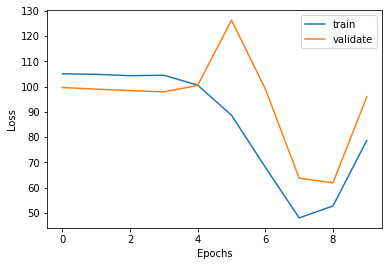

In [53]:
# plot training history
plt.plot(g_model.history.history['loss'], label='train')
plt.plot(g_model.history.history['val_loss'], label='validate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Learning_rate=Variable')
plt.legend()
plt.show()

### Testing 

In [106]:
df_wellbt2 = pd.read_csv(dir_path+'DATA_for_DL-Well_bt2_data.csv')
df_wellbt2

,Unnamed: 0,"Depth, m","Porosity, pc",File Name
0,0,4037.75,21.1,15_9_19_bt2\15_9_19_bt2_p2_4037.75.png
1,1,4038.75,21.7,15_9_19_bt2\15_9_19_bt2_p2_4038.75.png
2,2,4039.75,19.9,15_9_19_bt2\15_9_19_bt2_p3_4039.75.png
3,3,4040.75,21.8,15_9_19_bt2\15_9_19_bt2_p3_4040.75.png
4,4,4041.75,20.9,15_9_19_bt2\15_9_19_bt2_p4_4041.75.png
...,...,...,...,...
61,61,4103.75,24.3,15_9_19_bt2\15_9_19_bt2_p33_4103.75.png
62,62,4104.75,24.0,15_9_19_bt2\15_9_19_bt2_p33_4104.75.png
63,63,4105.80,15.4,15_9_19_bt2\15_9_19_bt2_p34_4105.80.png
64,64,4106.45,15.5,15_9_19_bt2\15_9_19_bt2_p34_4106.45.png


In [107]:
X_databt2Left=[]
X_databt2Right=[]
y_databt2=[]
for ind in df_wellbt2.index:
    y_databt2.append(df_wellbt2['Porosity, pc'][ind])
    imLeft = Image.open((dir_path+df_wellbt2['File Name'][ind][:-4]).replace('\\','/')+'_left.jpg')
    X_databt2Left.append(np.array(imLeft))
    imRight = Image.open((dir_path+df_wellbt2['File Name'][ind][:-4]).replace('\\','/')+'_right.jpg')
    X_databt2Right.append(np.array(imRight))
    #print(ind,df_wellA['Porosity, pc'][ind],df_wellA['File Name'][ind])

In [108]:
y_databt2=np.array(y_databt2)/36
y_databt2.shape

(66,)

In [109]:
X_databt2Left=np.array(X_databt2Left)/255
X_databt2Left.shape

(66, 1536, 1024, 3)

In [110]:
X_databt2Right=np.array(X_databt2Right)/255
X_databt2Right.shape

(66, 1536, 1024, 3)

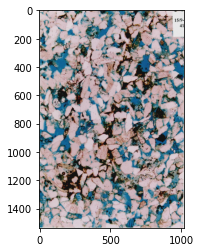

In [111]:
plt.imshow(X_databt2Left[60,:,:,:])

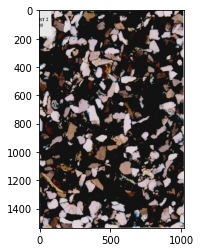

In [112]:
plt.imshow(X_databt2Right[60,:,:,:])

coefficient of determination: 0.3992492424331149


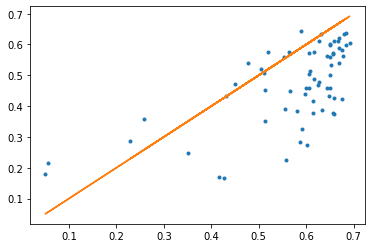

In [115]:
model = load_model('savemodels/ThinSectionAE_left_right-model-137-13.2384-17.0344.hdf5') #max pooling added, lr -.001, filter (2,2), mpe
X_databt2_predict = model.predict([X_databt2Left,X_databt2Right])
plt.plot(y_databt2,X_databt2_predict,'.')
plt.plot(y_databt2,y_databt2,'-')
linear = LinearRegression()
linear.fit(y_databt2.reshape(X_databt2_predict.shape[0],X_databt2_predict.shape[1]),X_databt2_predict.reshape(X_databt2_predict.shape[0],X_databt2_predict.shape[1]))
r_sq = linear.score(y_databt2.reshape(X_databt2_predict.shape[0],X_databt2_predict.shape[1]),X_databt2_predict.reshape(X_databt2_predict.shape[0],X_databt2_predict.shape[1]))
print('coefficient of determination:', r_sq)

### Training on both datasets

In [117]:
X_databt2Left=np.concatenate((X_databt2Left,np.flip(X_databt2Left,axis=1),np.flip(X_databt2Left,axis=2),np.flip(np.flip(X_databt2Left,axis=1),axis=2)),axis=0)
X_databt2Right=np.concatenate((X_databt2Right,np.flip(X_databt2Right,axis=1),np.flip(X_databt2Right,axis=2),np.flip(np.flip(X_databt2Right,axis=1),axis=2)),axis=0)
y_databt2=np.concatenate((y_databt2,y_databt2,y_databt2,y_databt2),axis=0)
print(X_databt2Left.shape)
print(X_databt2Right.shape)
print(y_databt2.shape)

(264, 1536, 1024, 3)
(264, 1536, 1024, 3)
(264,)


In [120]:
X_dataLeft = np.concatenate((X_dataAleft,X_databt2Left),axis=0)
X_dataRight = np.concatenate((X_dataAright,X_databt2Right),axis=0)
y_data = np.concatenate((y_dataA,y_databt2),axis=0)
print(X_dataLeft.shape)
print(X_dataRight.shape)
print(y_data.shape)

(872, 1536, 1024, 3)
(872, 1536, 1024, 3)
(872,)


In [122]:
X_trainLeft, X_testLeft, X_trainRight, X_testRight, y_train, y_test = train_test_split(X_dataLeft, X_dataRight, y_data, test_size=0.10, random_state=42)
print(X_trainLeft.shape)
print(X_testLeft.shape)
print(X_trainRight.shape)
print(X_testRight.shape)
print(y_train.shape)
print(y_test.shape)

(784, 1536, 1024, 3)
(88, 1536, 1024, 3)
(784, 1536, 1024, 3)
(88, 1536, 1024, 3)
(784,)
(88,)


In [124]:
keras.backend.clear_session()
# define input shape based on the loaded dataset
image_shape = X_trainLeft[0].shape

g_model = define_generator(image_shape)

# compile model
opt = Adam(lr=0.001, beta_1=0.5)

g_model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['mse']) #, 'mae', 'mean_absolute_percentage_error

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
filepath = "ThinSectionAE_left-2wells-model-{epoch:02d}-{loss:.4f}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min',period=1)

history = g_model.fit([X_trainLeft,X_trainRight], y_train,
          epochs=200,
          batch_size=32,
          shuffle=True,
          verbose=1,
          validation_data=([X_testLeft,X_testRight], y_test),
          callbacks=[checkpoint])

Train on 784 samples, validate on 88 samples
Epoch 1/200
784/784 [==============================] - 199s 253ms/step - loss: 58.0311 - mse: 0.0778 - val_loss: 76.3157 - val_mse: 0.1876

Epoch 00001: val_loss improved from inf to 76.31565, saving model to ThinSectionAE_left-2wells-model-01-58.0311-76.3157.hdf5
Epoch 2/200
784/784 [==============================] - 191s 244ms/step - loss: 46.5966 - mse: 0.0566 - val_loss: 45.6371 - val_mse: 0.0579

Epoch 00002: val_loss improved from 76.31565 to 45.63707, saving model to ThinSectionAE_left-2wells-model-02-46.5966-45.6371.hdf5
Epoch 3/200
784/784 [==============================] - 182s 232ms/step - loss: 42.1296 - mse: 0.0496 - val_loss: 63.9066 - val_mse: 0.0569

Epoch 00003: val_loss did not improve from 45.63707
Epoch 4/200
784/784 [==============================] - 176s 225ms/step - loss: 39.0385 - mse: 0.0431 - val_loss: 29.8977 - val_mse: 0.0325

Epoch 00004: val_loss improved from 45.63707 to 29.89775, saving model to ThinSectionAE_

784/784 [==============================] - 170s 217ms/step - loss: 14.6679 - mse: 0.0064 - val_loss: 31.4880 - val_mse: 0.0225

Epoch 00040: val_loss did not improve from 22.88927
Epoch 41/200
784/784 [==============================] - 168s 214ms/step - loss: 14.9365 - mse: 0.0066 - val_loss: 31.8548 - val_mse: 0.0214

Epoch 00041: val_loss did not improve from 22.88927
Epoch 42/200
784/784 [==============================] - 170s 217ms/step - loss: 14.5302 - mse: 0.0063 - val_loss: 41.2886 - val_mse: 0.0246

Epoch 00042: val_loss did not improve from 22.88927
Epoch 43/200
784/784 [==============================] - 170s 216ms/step - loss: 13.0685 - mse: 0.0060 - val_loss: 42.5768 - val_mse: 0.0259

Epoch 00043: val_loss did not improve from 22.88927
Epoch 44/200
784/784 [==============================] - 170s 217ms/step - loss: 12.4566 - mse: 0.0055 - val_loss: 37.4520 - val_mse: 0.0266

Epoch 00044: val_loss did not improve from 22.88927
Epoch 45/200
784/784 [==========================

784/784 [==============================] - 174s 222ms/step - loss: 10.2025 - mse: 0.0028 - val_loss: 27.3337 - val_mse: 0.0182

Epoch 00082: val_loss did not improve from 22.51393
Epoch 83/200
784/784 [==============================] - 171s 218ms/step - loss: 11.2721 - mse: 0.0037 - val_loss: 34.8971 - val_mse: 0.0229

Epoch 00083: val_loss did not improve from 22.51393
Epoch 84/200
784/784 [==============================] - 165s 211ms/step - loss: 11.0614 - mse: 0.0036 - val_loss: 26.8493 - val_mse: 0.0192

Epoch 00084: val_loss did not improve from 22.51393
Epoch 85/200
784/784 [==============================] - 168s 215ms/step - loss: 12.4317 - mse: 0.0042 - val_loss: 26.4909 - val_mse: 0.0186

Epoch 00085: val_loss did not improve from 22.51393
Epoch 86/200
784/784 [==============================] - 167s 213ms/step - loss: 11.4211 - mse: 0.0036 - val_loss: 27.7369 - val_mse: 0.0189

Epoch 00086: val_loss did not improve from 22.51393
Epoch 87/200
784/784 [==========================

784/784 [==============================] - 172s 219ms/step - loss: 10.4626 - mse: 0.0029 - val_loss: 29.1660 - val_mse: 0.0203

Epoch 00125: val_loss did not improve from 22.51393
Epoch 126/200
784/784 [==============================] - 172s 219ms/step - loss: 10.4087 - mse: 0.0029 - val_loss: 25.8336 - val_mse: 0.0193

Epoch 00126: val_loss did not improve from 22.51393
Epoch 127/200
784/784 [==============================] - 167s 213ms/step - loss: 10.3234 - mse: 0.0029 - val_loss: 26.4250 - val_mse: 0.0188

Epoch 00127: val_loss did not improve from 22.51393
Epoch 128/200
784/784 [==============================] - 170s 217ms/step - loss: 11.7980 - mse: 0.0035 - val_loss: 26.3902 - val_mse: 0.0194

Epoch 00128: val_loss did not improve from 22.51393
Epoch 129/200
784/784 [==============================] - 166s 212ms/step - loss: 9.9392 - mse: 0.0028 - val_loss: 26.8611 - val_mse: 0.0188

Epoch 00129: val_loss did not improve from 22.51393
Epoch 130/200
784/784 [======================

KeyboardInterrupt: 

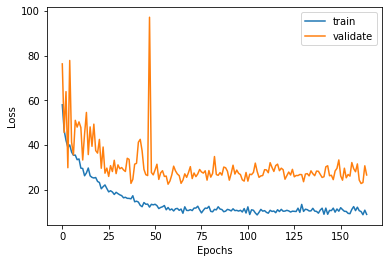

In [125]:
# plot training history
plt.plot(g_model.history.history['loss'], label='train')
plt.plot(g_model.history.history['val_loss'], label='validate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.title('Learning_rate=Variable')
plt.legend()
plt.show()

coefficient of determination: 0.5932444327144675


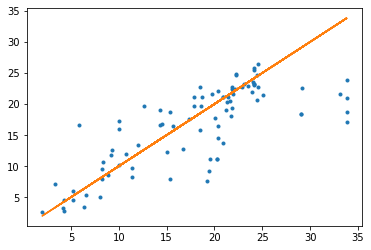

In [130]:
model = load_model('ThinSectionAE_left-2wells-model-58-12.1080-22.5139.hdf5') #max pooling added, lr -.001, filter (2,2), mpe
X_test_predict = model.predict([X_testLeft,X_testRight])
plt.plot(y_test*36,X_test_predict*36,'.')
plt.plot(y_test*36,y_test*36,'-')
linear = LinearRegression()
linear.fit(y_test.reshape(X_test_predict.shape[0],X_test_predict.shape[1])*36,X_test_predict.reshape(X_test_predict.shape[0],X_test_predict.shape[1])*36)
r_sq = linear.score(y_test.reshape(X_test_predict.shape[0],X_test_predict.shape[1])*36,X_test_predict.reshape(X_test_predict.shape[0],X_test_predict.shape[1])*36)
print('coefficient of determination:', r_sq)